In [5]:
import numpy as np
import pandas as pd
import time
from matplotlib.pyplot import *

In [6]:
%matplotlib notebook

In [23]:
covid = pd.read_csv('covid19-withGeo.dat')
#print(covid[['date','cases']].groupby('date').sum())

<IPython.core.display.Javascript object>


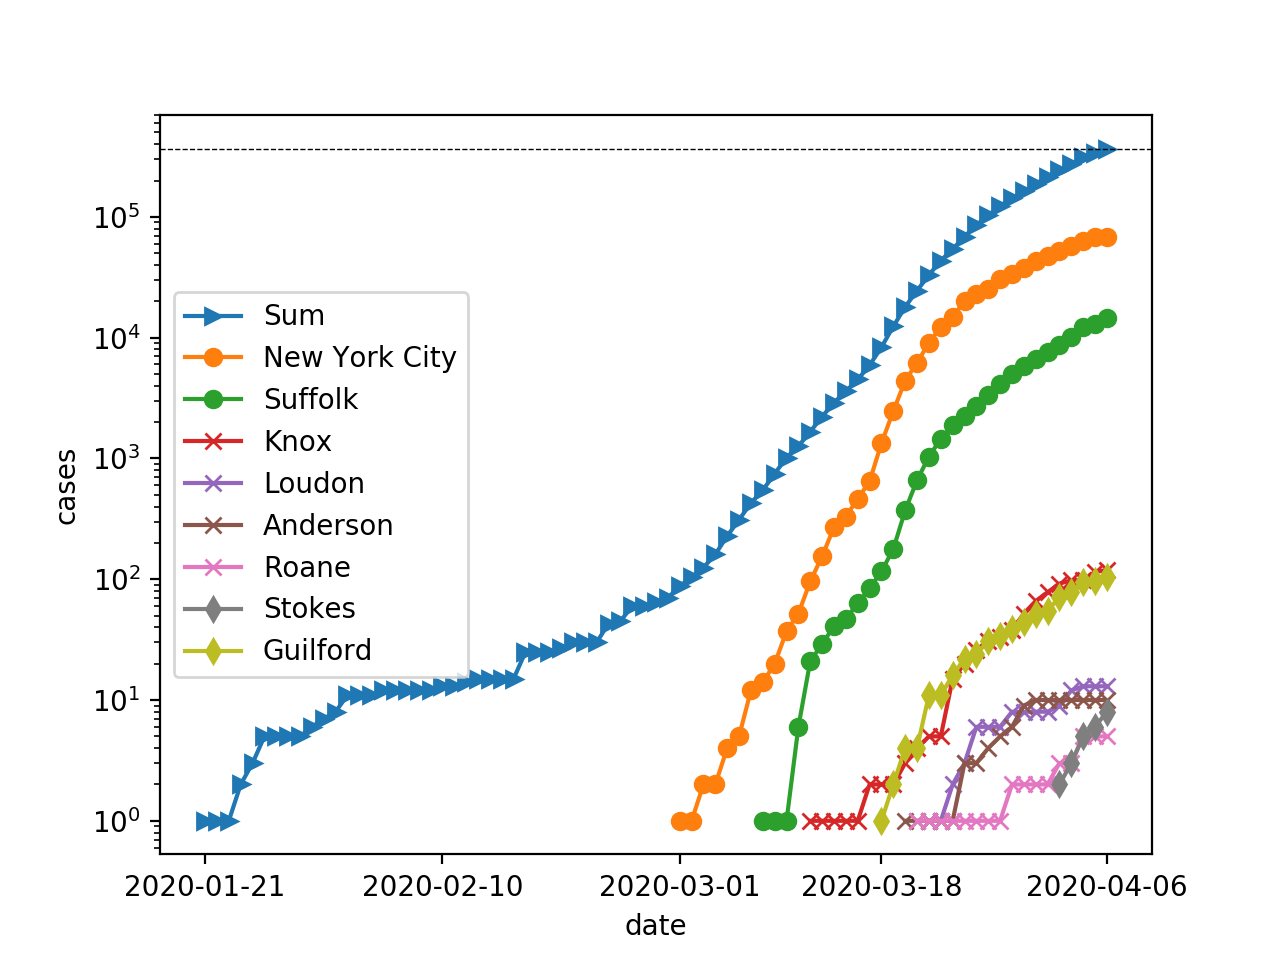

In [45]:
covidNY = covid[(covid.state == "New York")]
covidTN = covid[(covid.state == "Tennessee")]
covidNC = covid[(covid.state == "North Carolina")]
covidSUM = covid[['date','cases']].groupby('date').sum()
#print(covidNC.county)

county_list = ["New York City","Suffolk"]#,'Nassau']
county_listTN = ["Knox","Loudon","Anderson","Roane"]
county_listNC = ["Stokes","Guilford"]
figure()
# plot sum
plot(covidSUM.index,covidSUM.cases,marker='>',label="Sum")
# plot county-by-county
for county in county_list:
    plot(covidNY[covidNY.county==county].date,covidNY[covidNY.county==county].cases,marker='o',label=county)
for county in county_listTN:
    plot(covidTN[covidTN.county==county].date,covidTN[covidTN.county==county].cases,marker='x',label=county)
for county in county_listNC:
    plot(covidNC[covidNC.county==county].date,covidNC[covidNC.county==county].cases,marker='d',label=county)
axhline(covidSUM.cases.max(),ls='--',lw=0.5,c='k')
tcks = ['2020-01-21','2020-02-10','2020-03-01','2020-03-18','2020-04-06']
xticks(tcks,tcks)
xlabel("date")
ylabel("cases")
yscale('log')
legend()

In [ ]:
covidSUM = covid.groupby

In [ ]:
# figure()
# plot(covidNY[covidNY.county=="New York City"].date,covidNY[covidNY.county=="New York City"].cases,marker='o')

In [46]:
#covidNY[covidNY.county=="New York City"]